In [25]:
# sherry_li_LAB1.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [26]:
# read csv data into df
url = "https://docs.google.com/spreadsheets/d/1dqoV22kEcC6R313KcHzZdp80-43W61AZL_Mg7uFlHXI/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)

print(df.head())





                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843  


In [10]:
# check data types
print (df.dtypes)

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


In [11]:
# data shape
df.shape

(77, 16)

In [27]:
# check missing values
# carbo, sugars, potass have missing values
print(df.count())
#print(df.isnull().sum())
print(df.isnull().any())
print(df.isna().sum())

name        77
mfr         77
type        77
calories    77
protein     77
fat         77
sodium      77
fiber       77
carbo       76
sugars      76
potass      75
vitamins    77
shelf       77
weight      77
cups        77
rating      77
dtype: int64
name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo        True
sugars       True
potass       True
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool
name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [28]:
# count affected rows and columns
rows_with_replacement = np.sum(df.isnull().any(axis=1))
cols_with_replacement = np.sum(df.isnull().any(axis=0))
print(f"Rows affected: {rows_with_replacement}")
print(f"Columns affected: {cols_with_replacement}")

Rows affected: 3
Columns affected: 3


In [29]:
# Count missing values before replacement
missing_before = df.isnull().sum().sum()

# replace missing values wit zero
df = df.where(pd.notnull(df), 0)

# Count missing values after replacement (should be 0)
missing_after = df.isnull().sum().sum()

# Number of replaced values
print(f"Number of replaced values: {missing_before}")
print(f"Number of null values after: {missing_after}")



Number of replaced values: 4
Number of null values after: 0


In [ ]:
"""
1. Summary of Statistics
Compute the mean, median, min, max and standard deviation for each cereal on the quantitative variables.

2. Correlation
Compute the correlation table for only the quantitative variables.

3. Histogram Visualization
Draw by hand or with an application program a histogram for the ‘rating’ variables.
"""

In [31]:
# 1. Summary of Statistics
# Compute the mean, median, min, max and standard deviation for each cereal on the quantitative variables.

# Select only numeric (quantitative) columns
quant_vars = df.select_dtypes(include="number")

# Compute summary statistics
summary = pd.DataFrame({
    "mean": quant_vars.mean(),
    "median": quant_vars.median(),
    "min": quant_vars.min(),
    "max": quant_vars.max(),
    "std": quant_vars.std()
})

print(summary)




                mean      median        min         max        std
calories  106.883117  110.000000  50.000000  160.000000  19.484119
protein     2.545455    3.000000   1.000000    6.000000   1.094790
fat         1.012987    1.000000   0.000000    5.000000   1.006473
sodium    159.675325  180.000000   0.000000  320.000000  83.832295
fiber       2.151948    2.000000   0.000000   14.000000   2.383364
carbo      14.610390   14.000000   0.000000   23.000000   4.232257
sugars      6.935065    7.000000   0.000000   15.000000   4.422840
potass     96.103896   90.000000   0.000000  330.000000  71.251147
vitamins   28.246753   25.000000   0.000000  100.000000  22.342523
shelf       2.207792    2.000000   1.000000    3.000000   0.832524
weight      1.029610    1.000000   0.500000    1.500000   0.150477
cups        0.821039    0.750000   0.250000    1.500000   0.232716
rating     42.665705   40.400208  18.042851   93.704912  14.047289


In [32]:
# Compute correlation table: Pearson correlation coefficient (values from -1 to 1)
corr_table = quant_vars.corr()

print(corr_table)

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.019066  0.498610  0.300649 -0.293413  0.252349   
protein   0.019066  1.000000  0.208431 -0.054674  0.500330 -0.125337   
fat       0.498610  0.208431  1.000000 -0.005407  0.016719 -0.318504   
sodium    0.300649 -0.054674 -0.005407  1.000000 -0.070675  0.353990   
fiber    -0.293413  0.500330  0.016719 -0.070675  1.000000 -0.359297   
carbo     0.252349 -0.125337 -0.318504  0.353990 -0.359297  1.000000   
sugars    0.564092 -0.324112  0.275086  0.096291 -0.141225 -0.352835   
potass   -0.066678  0.549667  0.193371 -0.032706  0.903647 -0.352861   
vitamins  0.265356  0.007335 -0.031156  0.361477 -0.032243  0.257065   
shelf     0.097234  0.133865  0.263691 -0.069719  0.297539 -0.107424   
weight    0.696091  0.216158  0.214625  0.308576  0.247226  0.136016   
cups      0.087200 -0.244469 -0.175892  0.119665 -0.513061  0.365930   
rating   -0.689376  0.470618 -0.409284 -0.401295  0.584160  0.05

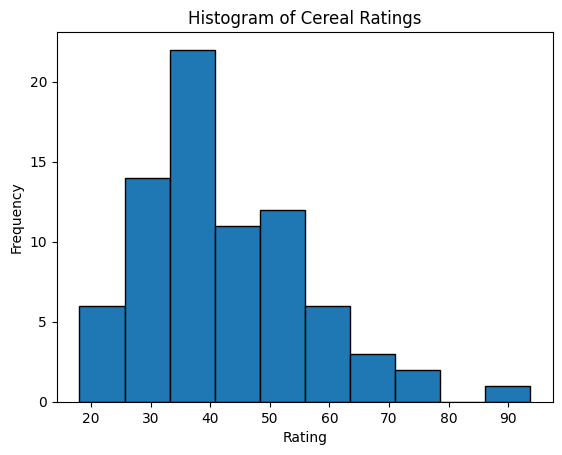

In [33]:
# 3. Histogram Visualization
# Draw by hand or with an application program a histogram for the ‘rating’ variables.
# tallying how many cereals fall into ranges like 0–20, 20–40, 40–60, etc.

# Plot histogram for 'rating'
plt.hist(df["rating"], bins=10, edgecolor="black")
plt.title("Histogram of Cereal Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()